In [1]:
from scipy.io import loadmat
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


%matplotlib inline

In [2]:
filelist = ["calcium_data/140708B_140811a_result", 
            "calcium_data/140909C_141112a_result", 
            "calcium_data/141006C_141121a_result",
            "calcium_data/150109A_150302a_result", 
            "calcium_data/151122A_160202a_result", 
            "calcium_data/151122B_160207a_result", 
            "calcium_data/160209A_160430a_result", 
            "calcium_data/160209B_160428a_result"]

In [3]:
filename =filelist[0]
f = h5py.File(filename+".hdf5", "r")
amp = 3

stims = np.unique(h5py.File(filename+".hdf5", "r")['meta'][:,1])[1:]        #exclude zero

assert(amp in list(stims)), "this stimAmp was not used in chosen experiment. Cose one from {}.".format(stims)

test_size = 0.33
svm_kernel = 'linear'
baseav = False

n_dendrites = h5py.File(filename+".hdf5", "r")['data'].shape[1]

clf = svm.SVC(kernel=svm_kernel)

means = []
stds = []
for site in range(n_dendrites):

    data = f['data']
    meta = f['meta']

    baseline = np.mean(data[:,:,:58], axis=2).reshape(data.shape[0], data.shape[1], 1)
    if baseav == True:
        baseline = np.mean(baseline, axis=0)

    mn_dnd_chng = np.mean(data[:,:,58:116]-baseline, axis=2)

    present_mask = meta[:,1]==amp
    absent_mask = meta[:,1]==0

    trials_mask = np.logical_or(present_mask, absent_mask)

    y_score = mn_dnd_chng[trials_mask, site]

    amp_mask = meta[:,1][trials_mask]==amp
    y_true = (amp_mask-0.5)*2
    X_train, X_test, y_train, y_test = train_test_split(y_score, y_true, test_size=test_size)
    
    #clf.fit(X_train.reshape(X_train.shape[0], 1), y_train.reshape(y_train.shape[0], 1))
    scores = cross_val_score(clf, y_score.reshape(y_score.shape[0], 1), y_true.reshape(y_true.shape[0]), cv=5)
    mean = scores.mean()
    stdv = scores.std()
    means.append(mean)
    stds.append(stdv)
                             
    print("For recording site {0}: accuracy: {1: .2f} (+/- {2: .2f})".format(site, mean, stdv*2))

For recording site 0: accuracy:  0.85 (+/-  0.14)
For recording site 1: accuracy:  0.80 (+/-  0.14)
For recording site 2: accuracy:  0.42 (+/-  0.10)
For recording site 3: accuracy:  0.60 (+/-  0.24)
For recording site 4: accuracy:  0.52 (+/-  0.10)
For recording site 5: accuracy:  0.45 (+/-  0.11)
For recording site 6: accuracy:  0.55 (+/-  0.14)
For recording site 7: accuracy:  0.52 (+/-  0.05)
For recording site 8: accuracy:  0.71 (+/-  0.16)
For recording site 9: accuracy:  0.48 (+/-  0.05)
For recording site 10: accuracy:  0.59 (+/-  0.12)
For recording site 11: accuracy:  0.54 (+/-  0.16)
For recording site 12: accuracy:  0.47 (+/-  0.05)
For recording site 13: accuracy:  0.56 (+/-  0.04)
For recording site 14: accuracy:  0.54 (+/-  0.12)
For recording site 15: accuracy:  0.53 (+/-  0.14)
For recording site 16: accuracy:  0.53 (+/-  0.10)
For recording site 17: accuracy:  0.62 (+/-  0.19)
For recording site 18: accuracy:  0.58 (+/-  0.14)
For recording site 19: accuracy:  0.51 (+

In [4]:
n_out = 6
inds = np.argsort(means)[::-1]

print("{} recordings sites best for classification:".format(n_out))
for i in range(n_out):
    print("At recording site {0}: accuracy: {1: .2f} (+/- {2: .2f})".format(inds[i], means[inds[i]], stds[inds[i]]*2))

6 recordings sites best for classification:
At recording site 109: accuracy:  0.90 (+/-  0.21)
At recording site 0: accuracy:  0.85 (+/-  0.14)
At recording site 66: accuracy:  0.83 (+/-  0.15)
At recording site 111: accuracy:  0.83 (+/-  0.19)
At recording site 114: accuracy:  0.82 (+/-  0.14)
At recording site 97: accuracy:  0.81 (+/-  0.12)


(0, 1)

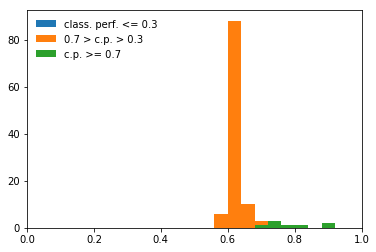

In [7]:
means = np.asarray(means)

lo_mask = means <= 0.3
mid_mask = np.logical_and(means >0.3, means < 0.7)
hi_mask = means >= 0.7

plt.hist(means[lo_mask], bins=50, range=(-1,1), label='class. perf. <= 0.3')
plt.hist(means[mid_mask], bins=50, range=(-1,1), label='0.7 > c.p. > 0.3')
plt.hist(means[hi_mask], bins=50, range=(-1,1), label='c.p. >= 0.7')
plt.legend(frameon=False)
plt.xlim(0,1)

In [45]:
amp = 3

test_size = 0.33
svm_kernel = 'linear'
baseav = False

n_dendrites = h5py.File(filename+".hdf5", "r")['data'].shape[1]

clf = svm.SVC(kernel=svm_kernel)

means = []
stds = []
bals = []
ns = []
for site in range(n_dendrites):

    data = f['data']
    meta = f['meta']

    baseline = np.mean(data[:,:,:58], axis=2).reshape(data.shape[0], data.shape[1], 1)
    if baseav == True:
        baseline = np.mean(baseline, axis=0)

    mn_dnd_chng = np.mean(data[:,:,58:116]-baseline, axis=2)

    present_mask = meta[:,1]==amp
    absent_mask = meta[:,1]==0

    trials_mask = np.logical_or(present_mask, absent_mask)

    y_score = mn_dnd_chng[trials_mask, site]

    hit_mask = meta[:, 2]==1
    
    #print(data[trials_mask])
    
    end_mask = hit_mask[trials_mask]
    y_true = (end_mask-0.5)*2
    
    balance = np.sum(end_mask)/end_mask.shape[0]
    n_y = end_mask.shape[0]
    
    bals.append(balance)
    ns.append(n_y)
    
    X_train, X_test, y_train, y_test = train_test_split(y_score, y_true, test_size=test_size)
    
    #clf.fit(X_train.reshape(X_train.shape[0], 1), y_train.reshape(y_train.shape[0], 1))
    scores = cross_val_score(clf, y_score.reshape(y_score.shape[0], 1), y_true.reshape(y_true.shape[0]), cv=5)
    mean = scores.mean()
    stdv = scores.std()
    means.append(mean)
    stds.append(stdv)
                             
    print("For recording site {0}: accuracy: {1: .2f} (+/- {2: .2f})".format(site, mean, stdv*2))

For recording site 0: accuracy:  0.89 (+/-  0.07)
For recording site 1: accuracy:  0.88 (+/-  0.10)
For recording site 2: accuracy:  0.53 (+/-  0.02)
For recording site 3: accuracy:  0.58 (+/-  0.10)
For recording site 4: accuracy:  0.56 (+/-  0.13)
For recording site 5: accuracy:  0.51 (+/-  0.09)
For recording site 6: accuracy:  0.49 (+/-  0.12)
For recording site 7: accuracy:  0.53 (+/-  0.02)
For recording site 8: accuracy:  0.74 (+/-  0.07)
For recording site 9: accuracy:  0.53 (+/-  0.02)
For recording site 10: accuracy:  0.60 (+/-  0.15)
For recording site 11: accuracy:  0.51 (+/-  0.06)
For recording site 12: accuracy:  0.51 (+/-  0.09)
For recording site 13: accuracy:  0.56 (+/-  0.08)
For recording site 14: accuracy:  0.61 (+/-  0.08)
For recording site 15: accuracy:  0.57 (+/-  0.16)
For recording site 16: accuracy:  0.53 (+/-  0.07)
For recording site 17: accuracy:  0.61 (+/-  0.18)
For recording site 18: accuracy:  0.53 (+/-  0.15)
For recording site 19: accuracy:  0.53 (+

KeyboardInterrupt: 

In [46]:
n_out = 6
inds = np.argsort(means)[::-1]

print("{} recordings sites best for classification:".format(n_out))
for i in range(n_out):
    print("At recording site {0}: accuracy: {1: .2f} (+/- {2: .2f}) with a positive label fraction of {3: .2f} out of {4}".format(inds[i], means[inds[i]], stds[inds[i]]*2, bals[inds[i]], ns[inds[i]]))

6 recordings sites best for classification:
At recording site 0: accuracy:  0.89 (+/-  0.07) with a positive label fraction of  0.47 out of 100
At recording site 1: accuracy:  0.88 (+/-  0.10) with a positive label fraction of  0.47 out of 100
At recording site 8: accuracy:  0.74 (+/-  0.07) with a positive label fraction of  0.47 out of 100
At recording site 17: accuracy:  0.61 (+/-  0.18) with a positive label fraction of  0.47 out of 100
At recording site 14: accuracy:  0.61 (+/-  0.08) with a positive label fraction of  0.47 out of 100
At recording site 10: accuracy:  0.60 (+/-  0.15) with a positive label fraction of  0.47 out of 100


In [50]:
filename = filelist[0]

f = h5py.File(filename+".hdf5", "r")
stims = np.unique(f['meta'][:,1])[1:]        #exclude zero
test_size = 0.33
svm_kernel = 'linear'
baseav = False

sc = []
for amp in stims:
    #average delta F
    #1s = 58 frames
    data = f['data']
    meta = f['meta']

    baseline = np.mean(data[:,:,:58], axis=2).reshape(data.shape[0], data.shape[1], 1)
    if baseav == True:
        baseline = np.mean(baseline, axis=0)

    mn_dnd_chng = np.mean(data[:,:,58:116]-baseline, axis=2)

    present_mask = meta[:,1]==amp
    absent_mask = meta[:,1]==0

    trials_mask = np.logical_or(present_mask, absent_mask)

    y_score = mn_dnd_chng[trials_mask, :]

    amp_mask = meta[:,1][trials_mask]==amp
    y_true = (amp_mask-0.5)*2

    n_dendrites = h5py.File(filename+".hdf5", "r")['data'].shape[1]

    clf = svm.SVC(kernel=svm_kernel)
    scores = cross_val_score(clf, y_score, y_true.reshape(y_true.shape[0]), cv=10)
    sc.append(scores)

In [52]:
for k, scores in enumerate(sc):
    print("For stimApm {0: .2f}: accuracy: {1: .2f} (+/- {2: .2f})".format(stims[k], np.mean(scores), 2*np.std(scores)))

For stimApm  0.50: accuracy:  0.46 (+/-  0.13)
For stimApm  1.00: accuracy:  0.66 (+/-  0.24)
For stimApm  1.50: accuracy:  0.68 (+/-  0.15)
For stimApm  2.00: accuracy:  0.79 (+/-  0.30)
For stimApm  2.50: accuracy:  0.83 (+/-  0.28)
For stimApm  3.00: accuracy:  0.95 (+/-  0.16)


<Container object of 3 artists>

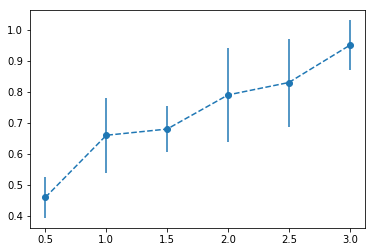

In [53]:
sc = np.array(sc)
means = np.mean(sc, axis=1)
std = np.std(sc, axis=1)

plt.errorbar(stims, means, yerr=std, fmt='--o')

In [42]:
filename = filelist[0]

f = h5py.File(filename+".hdf5", "r")
stims = np.unique(f['meta'][:,1])[1:]        #exclude zero
test_size = 0.33
svm_kernel = 'linear'
baseav = False

sc = []
bals = []
ns = []
for amp in stims:
    #average delta F
    #1s = 58 frames
    data = f['data']
    meta = f['meta']

    baseline = np.mean(data[:,:,:58], axis=2).reshape(data.shape[0], data.shape[1], 1)
    if baseav == True:
        baseline = np.mean(baseline, axis=0)

    mn_dnd_chng = np.mean(data[:,:,58:116]-baseline, axis=2)

    present_mask = meta[:,1]==amp
    absent_mask = meta[:,1]==0

    trials_mask = np.logical_or(present_mask, absent_mask)
    
    y_score = mn_dnd_chng[trials_mask, :]

    hit_mask = meta[:, 2]==1
    
    #print(data[trials_mask])
    
    end_mask = hit_mask[trials_mask]
    y_true = (end_mask-0.5)*2
    
    balance = np.sum(end_mask)/end_mask.shape[0]
    n_y = end_mask.shape[0]
    
    bals.append(balance)
    ns.append(n_y)

    n_dendrites = h5py.File(filename+".hdf5", "r")['data'].shape[1]

    clf = svm.SVC(kernel=svm_kernel)
    scores = cross_val_score(clf, y_score, y_true.reshape(y_true.shape[0]), cv=10)
    sc.append(scores)

In [43]:
for k, scores in enumerate(sc):
    print("For stimApm {0: .2f}: accuracy: {1: .2f} (+/- {2: .2f})".format(stims[k], np.mean(scores), 2*np.std(scores)))

For stimApm  0.50: accuracy:  0.90 (+/-  0.13)
For stimApm  1.00: accuracy:  0.85 (+/-  0.19)
For stimApm  1.50: accuracy:  0.77 (+/-  0.37)
For stimApm  2.00: accuracy:  0.78 (+/-  0.20)
For stimApm  2.50: accuracy:  0.84 (+/-  0.23)
For stimApm  3.00: accuracy:  0.80 (+/-  0.23)


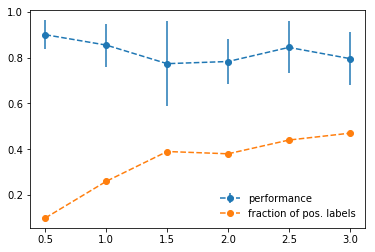

In [44]:
sc = np.array(sc)
means = np.mean(sc, axis=1)
std = np.std(sc, axis=1)

plt.errorbar(stims, means, yerr=std, fmt='--o', label='performance')
plt.errorbar(stims, bals, fmt='--o', label='fraction of pos. labels')
plt.legend(frameon=False)

In [55]:
f = h5py.File(filename+".hdf5", "r")
f['data'].shape
np.arange(0,120, 2)

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118])

In [67]:
#most informative time
filename = filelist[0]

f = h5py.File(filename+".hdf5", "r")
stims = np.unique(f['meta'][:,1])[1:]        #exclude zero
test_size = 0.33
svm_kernel = 'linear'
baseav = False

bals = []
ns = []

n_shift = 2
av_time = 58
n_times = f['data'].shape[2]
start_inds = np.arange(0,n_times-av_time, 2)
bl_time = 50

scs = []
for start in start_inds:
    sc = []
    for amp in stims:
        #average delta F
        #1s = 58 frames
        data = f['data']
        meta = f['meta']

        baseline = np.mean(data[:,:,:58], axis=2).reshape(data.shape[0], data.shape[1], 1)
        if baseav == True:
            baseline = np.mean(baseline, axis=0)
        
        #if the averaging window is before the stimulus, do not subtract baseline
        if start < bl_time:
            baseline = np.zeros((baseline.shape[0], baseline.shape[1], baseline.shape[2]))

        mn_dnd_chng = np.mean(data[:,:,start:start+av_time]-baseline, axis=2)

        present_mask = meta[:,1]==amp
        absent_mask = meta[:,1]==0

        trials_mask = np.logical_or(present_mask, absent_mask)

        y_score = mn_dnd_chng[trials_mask, :]

        hit_mask = meta[:, 2]==1

        #print(data[trials_mask])

        end_mask = hit_mask[trials_mask]
        y_true = (end_mask-0.5)*2

        balance = np.sum(end_mask)/end_mask.shape[0]
        n_y = end_mask.shape[0]

        bals.append(balance)
        ns.append(n_y)

        n_dendrites = h5py.File(filename+".hdf5", "r")['data'].shape[1]

        clf = svm.SVC(kernel=svm_kernel)
        scores = cross_val_score(clf, y_score, y_true.reshape(y_true.shape[0]), cv=10)
        sc.append(scores)
    scs.append(sc)

Best time window on average: 50:108
Best time window on max. stim: 0:58
Best time window on max. stim: 0:58


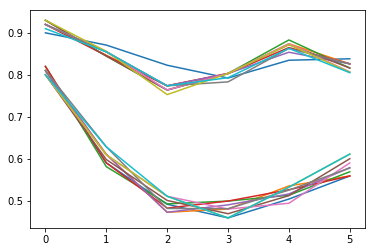

In [87]:
scs = np.array(scs)
m_scs = np.mean(scs, axis=2)
m_vals = np.mean(m_scs, axis=1)
inds = np.argsort(m_vals)

#max_vals = np.mean(m_scs[:,5])
#min_vals = np.mean(m_scs[:,0])
max_inds = np.argsort(max_vals)
min_inds = np.argsort(min_vals)

for i in inds[:10]:
    plt.plot(m_scs[i])
    
for i in inds[::-1][:10]:
    plt.plot(m_scs[i])
    
print('Best time window on average: {}:{}'.format((inds[::-1][0])*2, (inds[::-1][0])*2+av_time))
print('Best time window on max. stim: {}:{}'.format((max_inds[::-1][0])*2, (max_inds[::-1][0])*2+av_time))
print('Best time window on max. stim: {}:{}'.format((min_inds[::-1][0])*2, (min_inds[::-1][0])*2+av_time))

In [88]:
max_inds

array([0])